# Список лэптопов с параметрами для выбора
Студент: Копытов Иван Максимович, группа М04-302В, ПММО

## Описание задачи
В данном проекте проводится анализ датасета с характеристиками ноутбуков для выявления оптимальных параметров нового устройства, которое будет выпускаться на рынок. Основная цель — понять, какие характеристики наиболее востребованы, чтобы ноутбук был успешен в продажах.

## Гипотеза
Ноутбуки, оснащённые наиболее популярными характеристиками (такими как объём оперативной памяти, хранилище, операционная система), будут более конкурентоспособны и востребованы среди пользователей.

## Цели анализа
1. Проверить качество данных (наличие пропусков, дубликатов, корректность типов данных).
2. Провести анализ числовых переменных (цена, оперативная память, рейтинг и др.).
3. Построить графики для визуального анализа и выявления закономерностей.
4. Определить взаимосвязи между переменными с помощью корреляционного анализа.
5. Сделать выводы и предложить оптимальные характеристики ноутбука.

## Описание датасета
Датасет взят с Kaggle и содержит информацию о ноутбуках, доступных на рынке:
- **name**: Название модели ноутбука.
- **price(in Rs.)**: Цена ноутбука (в рупиях).
- **processor**: Информация о процессоре.
- **ram**: Объём оперативной памяти (RAM).
- **os**: Операционная система.
- **storage**: Объём и тип хранилища (HDD/SSD).
- **display(in inch)**: Размер экрана (в дюймах).
- **rating**: Средний пользовательский рейтинг.
- **no_of_ratings**: Количество оценок.
- **no_of_reviews**: Количество отзывов.

## План работы
1. Импортировать библиотеки и загрузить данные.
2. Провести обработку данных:
   - Проверить типы данных и исправить их при необходимости.
   - Обработать пропущенные значения.
   - Проверить и удалить дубликаты.
3. Рассчитать основные статистические показатели.
4. Построить графики для анализа:
   - Гистограммы.
   - Коробчатые диаграммы.
   - Матрицу корреляций и тепловую карту.
5. Сделать выводы и предложить рекомендации по характеристикам ноутбуков.


In [24]:
# Анализ и визуализация данных

## Импорт библиотек и загрузка данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = 'laptops.csv'  # Укажите путь к вашему файлу
laptops_df = pd.read_csv(file_path)

# Первичный осмотр данных
laptops_df.head()


,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0



Проверка данных
Типы данных, пропущенные значения и дубликаты
python
Копировать код


In [25]:
# Проверка типов данных
laptops_df.info()

# Проверка на пропуски
null_values = laptops_df.isnull().sum()
print("Пропуски в данных:\n", null_values)

# Проверка на дубликаты
duplicates = laptops_df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 92.4+ KB
Пропуски в данных:
 Unnamed: 0            0
img_link              0
name                  0
price(in Rs.)         0
processor             0
ram                   0
os        


Очистка и обработка данных
python
Копировать код


In [26]:
# Удаление ненужных столбцов
laptops_df = laptops_df.drop(columns=["Unnamed: 0", "img_link"])

# Заполнение пропущенных значений медианой
laptops_df['rating'].fillna(laptops_df['rating'].median(), inplace=True)
laptops_df['no_of_ratings'].fillna(laptops_df['no_of_ratings'].median(), inplace=True)
laptops_df['no_of_reviews'].fillna(laptops_df['no_of_reviews'].median(), inplace=True)

# Извлечение числовых значений из строк
laptops_df['ram'] = laptops_df['ram'].str.extract('(\d+)').astype(int)
laptops_df['storage'] = laptops_df['storage'].str.extract('(\d+)').astype(int)

# Проверка после обработки
laptops_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              984 non-null    object 
 1   price(in Rs.)     984 non-null    int64  
 2   processor         984 non-null    object 
 3   ram               984 non-null    int64  
 4   os                984 non-null    object 
 5   storage           984 non-null    int64  
 6   display(in inch)  984 non-null    float64
 7   rating            984 non-null    float64
 8   no_of_ratings     984 non-null    float64
 9   no_of_reviews     984 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 77.0+ KB


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_15178/1051867768.py:10: SyntaxWarning: invalid escape sequence '\d'
  laptops_df['ram'] = laptops_df['ram'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_15178/1051867768.py:11: SyntaxWarning: invalid escape sequence '\d'
  laptops_df['storage'] = laptops_df['storage'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_15178/1051867768.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(v

## Рассчёт основных статистических показателей
Здесь рассчитываются ключевые статистические показатели, такие как:
- Среднее значение.
- Медиана.
- Стандартное отклонение.
- Минимальные и максимальные значения.

Эти показатели дают представление о центральной тенденции и вариативности данных.


In [27]:
# Рассчет основных статистик
laptops_df.describe()


,price(in Rs.),ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,80960.720528,11.577236,334.867886,15.148374,4.289431,529.153455,61.969512
std,57421.220919,5.712698,224.550834,1.332078,0.276164,1491.771149,180.027649
min,15990.000000,4.000000,1.000000,11.600000,1.600000,1.000000,0.000000
25%,42655.000000,8.000000,1.000000,14.000000,4.200000,37.000000,3.000000
50%,62990.000000,8.000000,512.000000,15.600000,4.300000,90.000000,11.000000
75%,94990.000000,16.000000,512.000000,15.600000,4.400000,247.000000,22.000000
max,419990.000000,32.000000,512.000000,35.000000,5.000000,15492.000000,2054.000000


## Построение гистограмм
Гистограммы отображают распределение данных по числовым переменным:
- **Цена**: Большинство ноутбуков находятся в диапазоне 40,000–80,000 рупий.
- **Рейтинг**: Большинство моделей имеют рейтинги 4.0–4.5, что указывает на высокую удовлетворённость пользователей.
- **RAM и Storage**: Основные пики — 8 ГБ и 16 ГБ для оперативной памяти, 512 ГБ для SSD.

Эти распределения помогают понять основные тенденции и популярные характеристики.


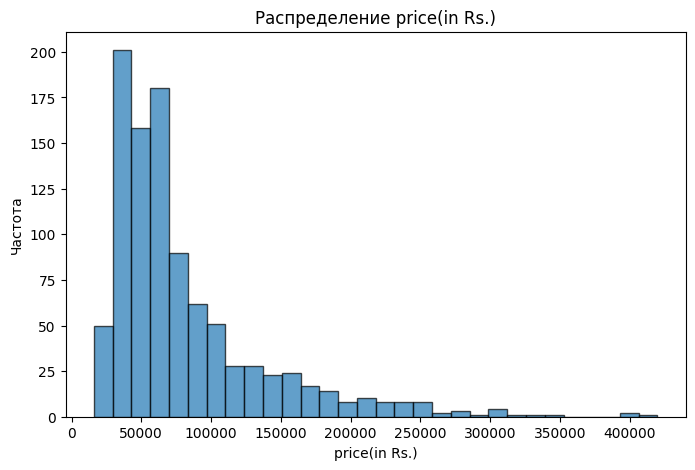

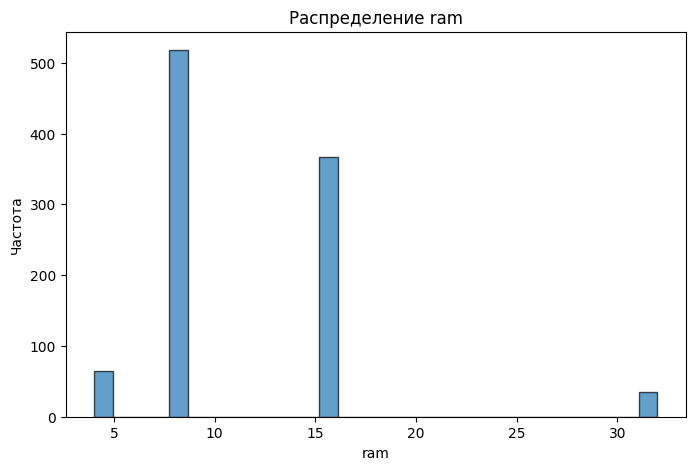

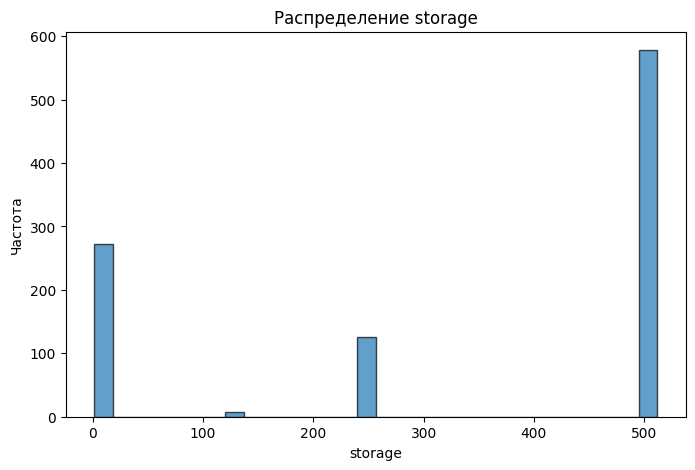

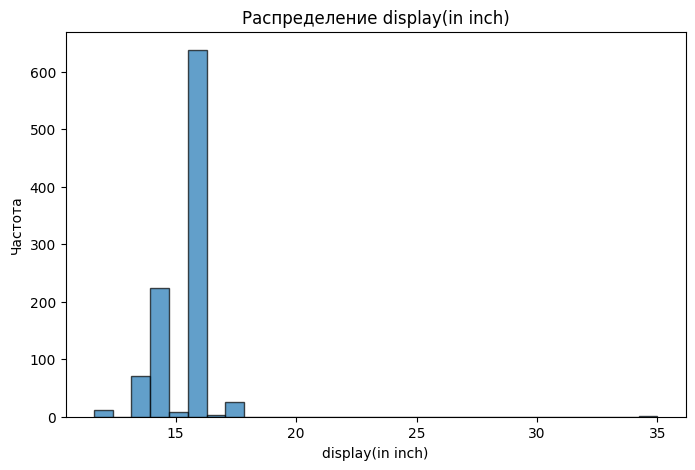

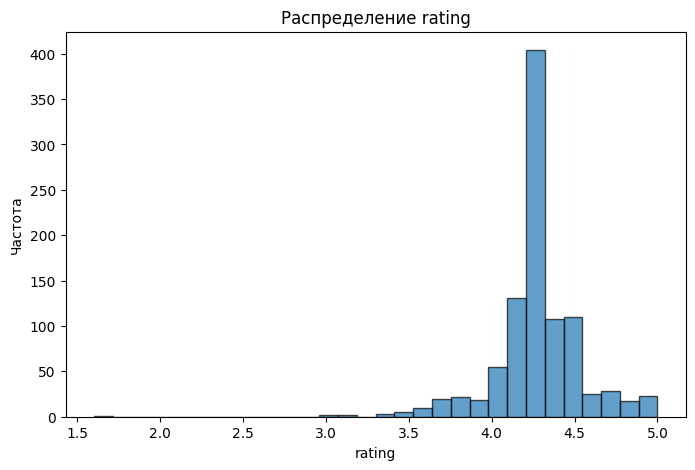

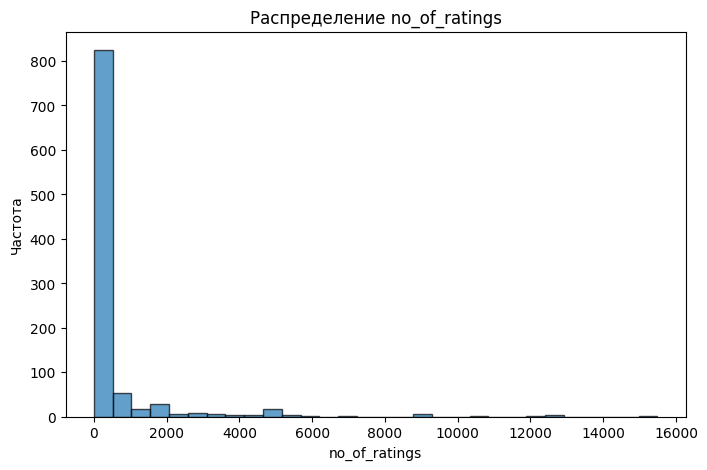

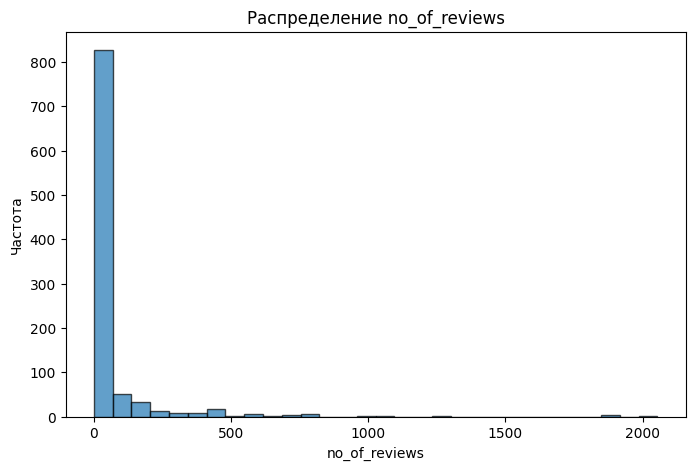

In [28]:
# Построение гистограмм для числовых данных
numeric_columns = ['price(in Rs.)', 'ram', 'storage', 'display(in inch)', 'rating', 'no_of_ratings', 'no_of_reviews']

for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(laptops_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()


## Построение коробчатых диаграмм
Коробчатые диаграммы используются для:
- Выявления выбросов (например, в цене или количестве отзывов).
- Оценки распределения данных.

### Анализ:
- **Цена**: Наблюдаются выбросы в области премиальных моделей.
- **Количество отзывов**: Есть несколько моделей с аномально большим числом отзывов, вероятно, из-за популярности бренда или агрессивного маркетинга.


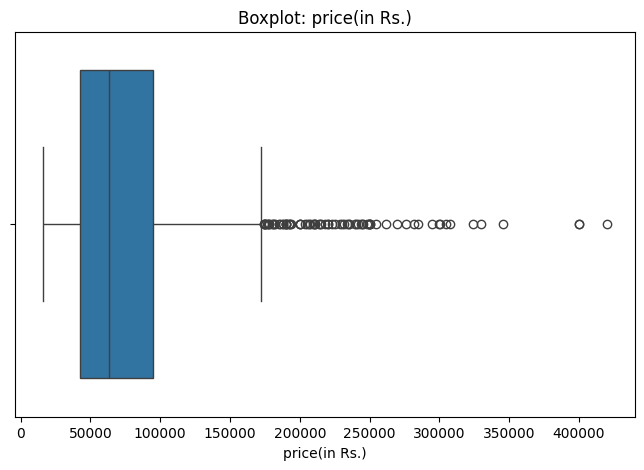

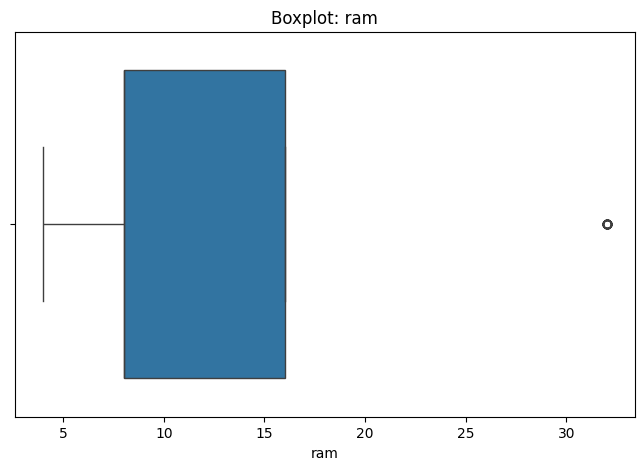

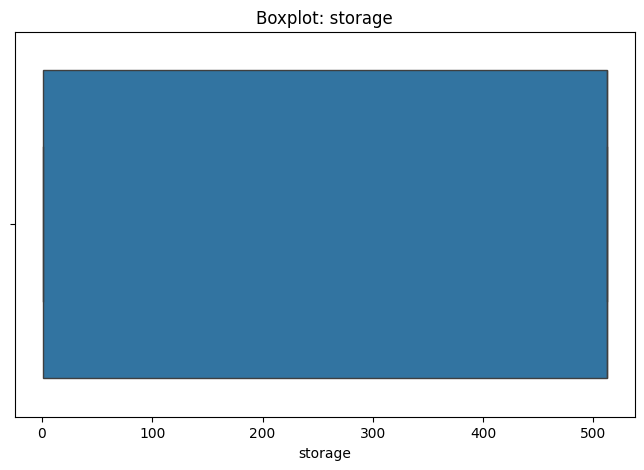

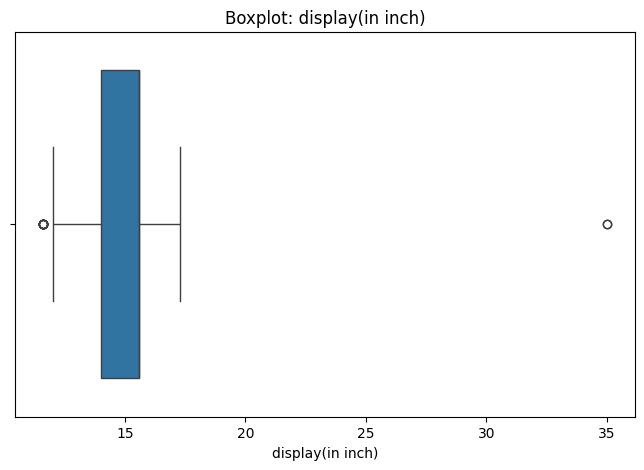

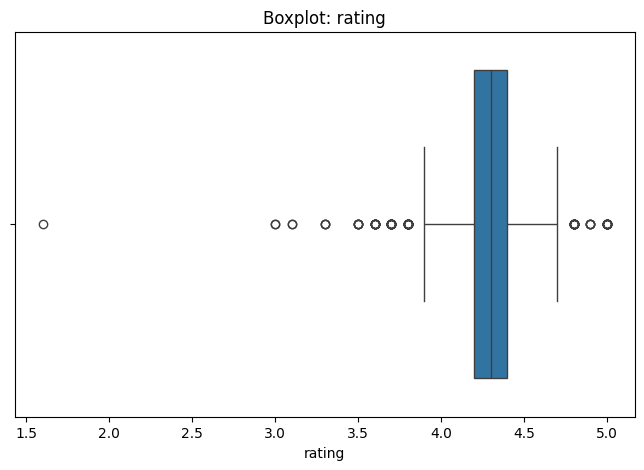

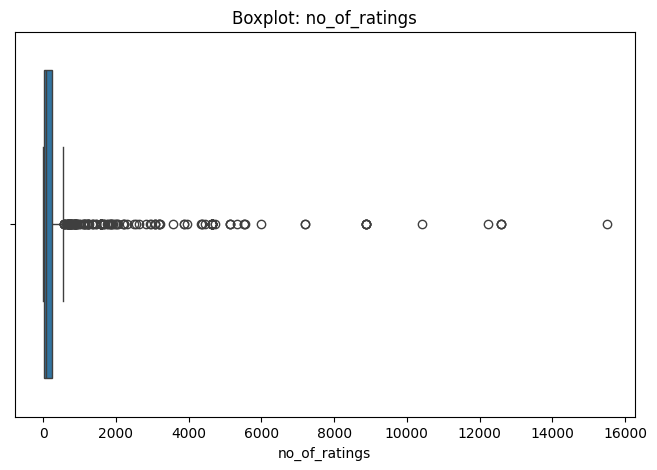

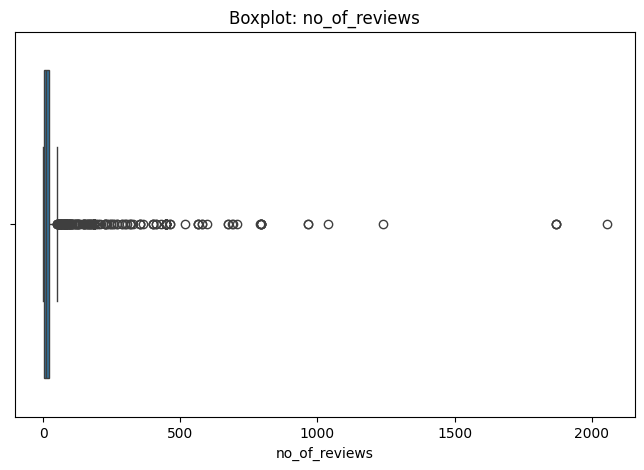

In [29]:
# Построение коробчатых диаграмм
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=laptops_df[column])
    plt.title(f'Boxplot: {column}')
    plt.show()


## Матрица корреляции и тепловая карта
Тепловая карта показывает взаимосвязь между числовыми переменными:
- Слабая корреляция между ценой и рейтингом указывает на то, что рейтинг не сильно зависит от стоимости устройства.
- Практически отсутствует корреляция между характеристиками, такими как объём памяти, и пользовательским рейтингом.

### Выводы:
- Рейтинг определяется не только техническими характеристиками, но и другими факторами, такими как бренд, удобство использования и послепродажное обслуживание.


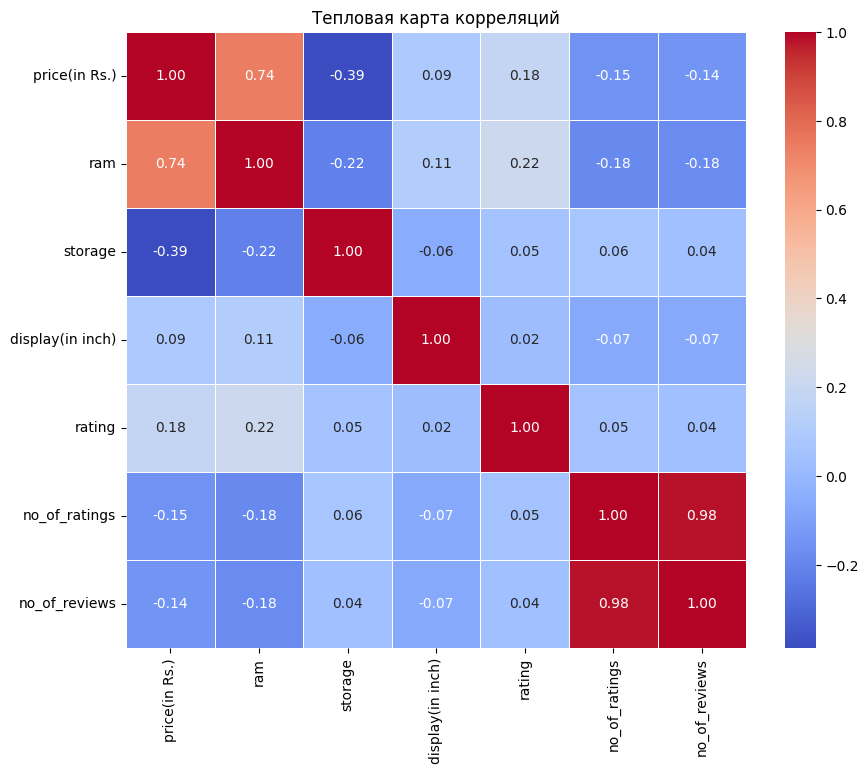

In [30]:
# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = laptops_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()



### Основные выводы:
1. Наиболее популярные характеристики:
   - RAM: 8–16 ГБ.
   - SSD: 512 ГБ.
   - OS: Windows 11.
   - Экран: 15.6 дюйма.
2. Влияние характеристик на рейтинг:
   - Цена слабо коррелирует с рейтингом.
   - Высокие рейтинги у моделей среднего класса (40,000–80,000 рупий).
3. Целевая аудитория:
   - Устройства средней ценовой категории получили больше положительных отзывов.

### Рекомендации:
- Выпустить ноутбук с характеристиками:
  - RAM: 8–16 ГБ.
  - SSD: 512 ГБ.
  - OS: Windows 11.
  - Экран: 15.6 дюйма.
  - Цена: 60,000–80,000 рупий.
- Добавить конфигурацию характеристик для пользователей.

## Построение гистограмм
Гистограммы отображают распределение данных по числовым переменным:
- **Цена**: Большинство ноутбуков находятся в диапазоне 40,000–80,000 рупий.
- **Рейтинг**: Большинство моделей имеют рейтинги 4.0–4.5, что указывает на высокую удовлетворённость пользователей.
- **RAM и Storage**: Основные пики — 8 ГБ и 16 ГБ для оперативной памяти, 512 ГБ для SSD.

Эти распределения помогают понять основные тенденции и популярные характеристики.


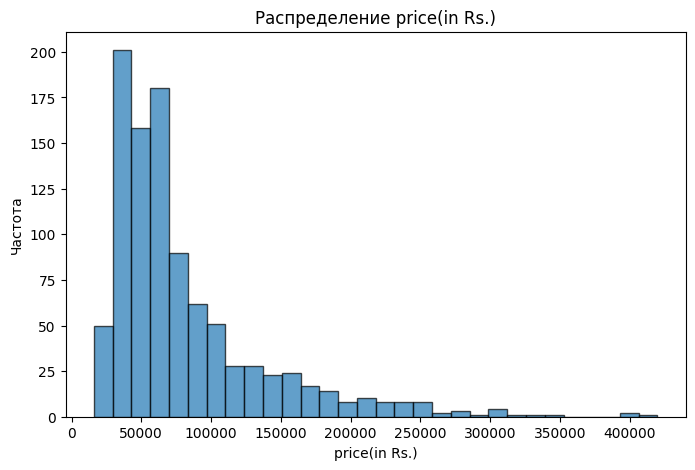

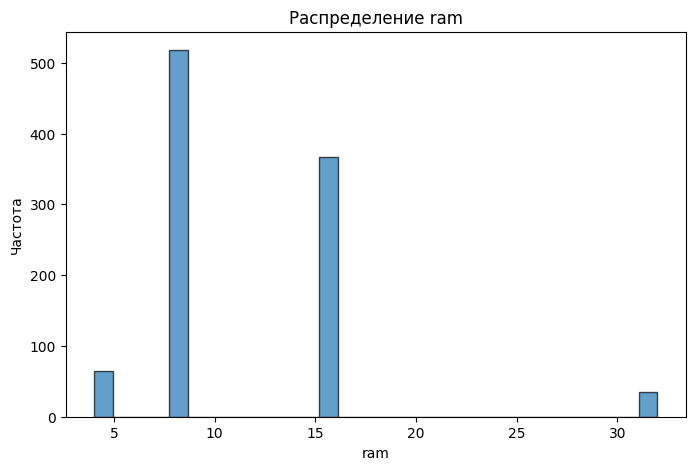

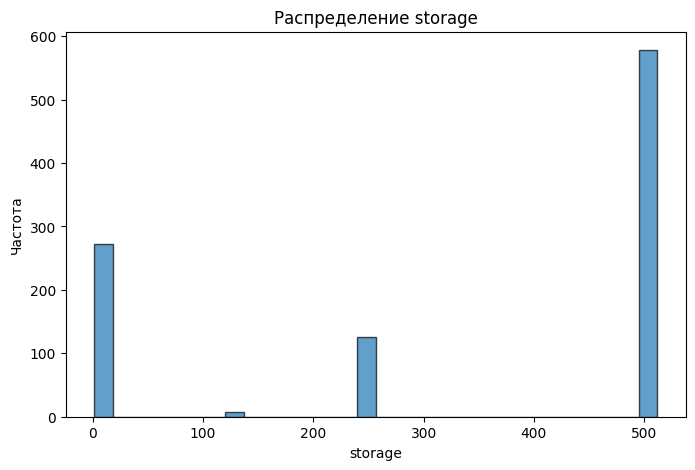

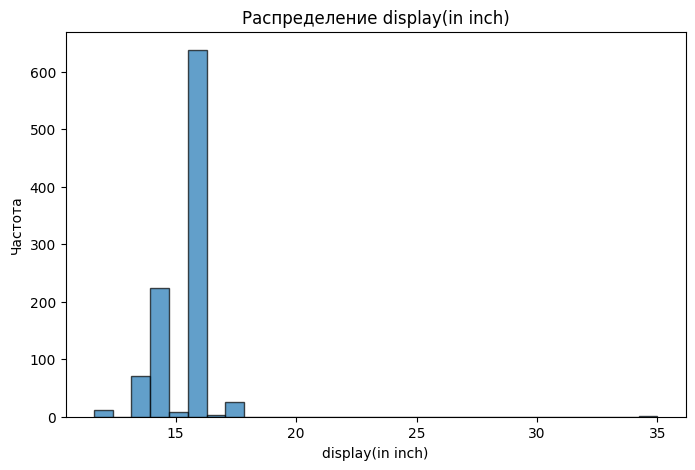

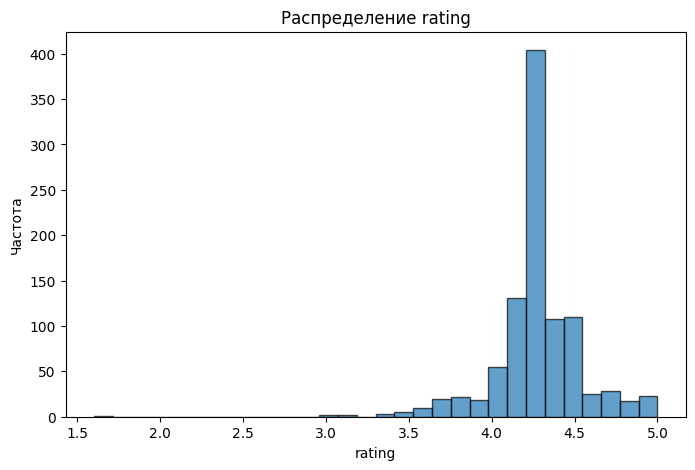

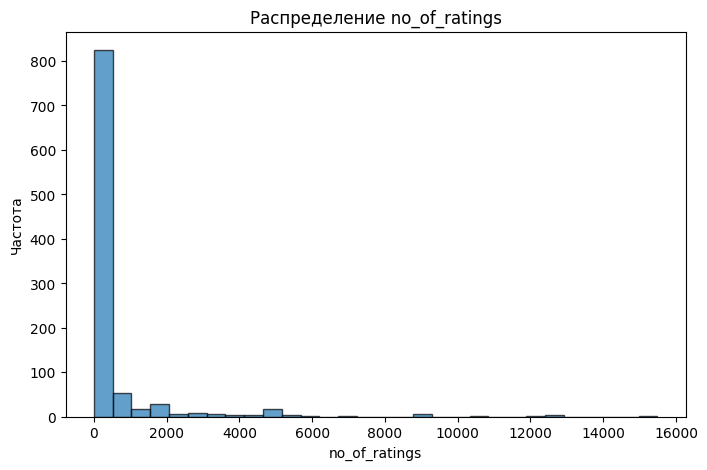

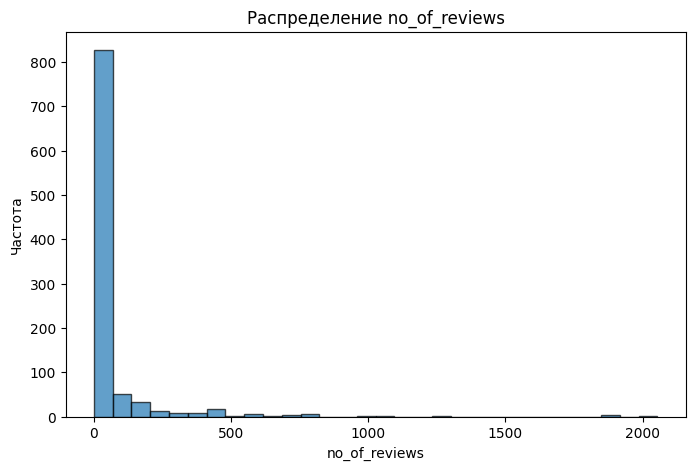

In [31]:
# Построение гистограмм для числовых данных
numeric_columns = ['price(in Rs.)', 'ram', 'storage', 'display(in inch)', 'rating', 'no_of_ratings', 'no_of_reviews']

for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(laptops_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()


## Построение коробчатых диаграмм
Коробчатые диаграммы используются для:
- Выявления выбросов (например, в цене или количестве отзывов).
- Оценки распределения данных.

### Анализ:
- **Цена**: Наблюдаются выбросы в области премиальных моделей.
- **Количество отзывов**: Есть несколько моделей с аномально большим числом отзывов, вероятно, из-за популярности бренда или агрессивного маркетинга.


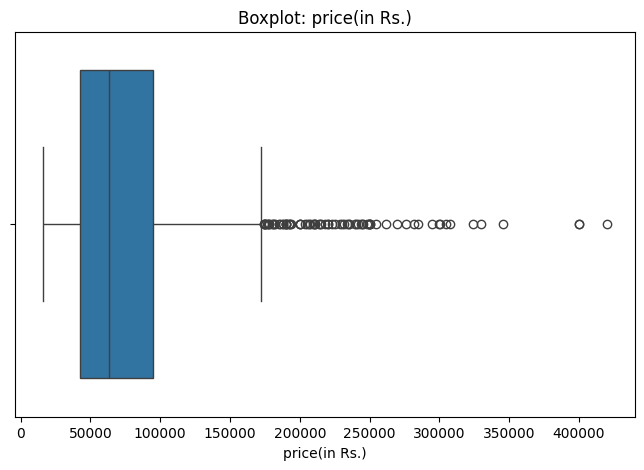

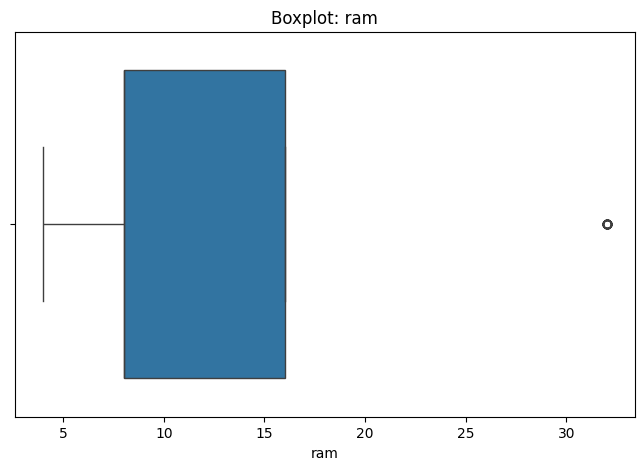

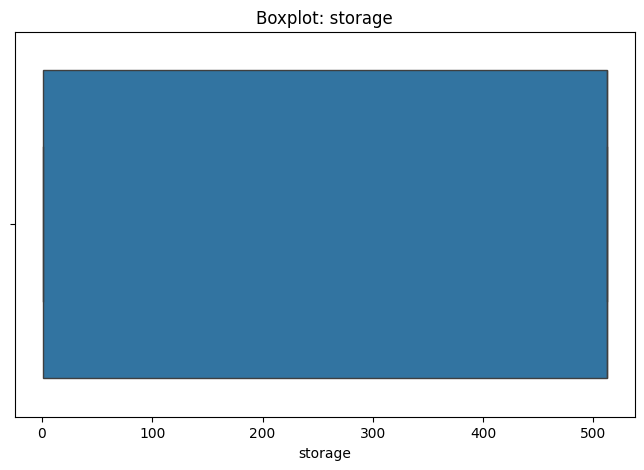

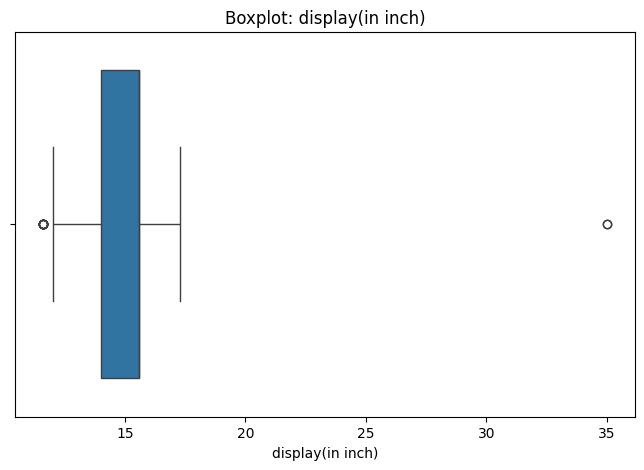

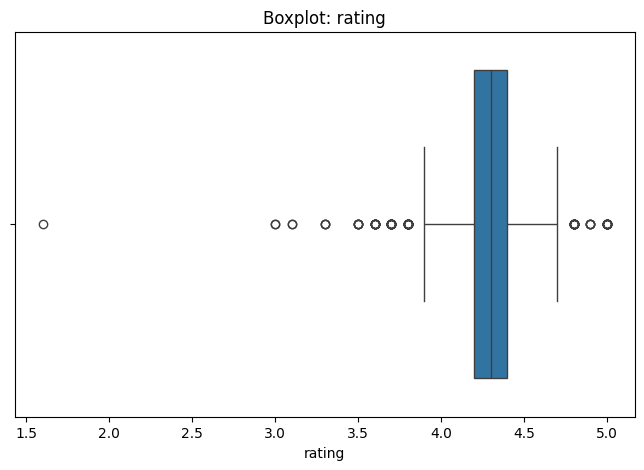

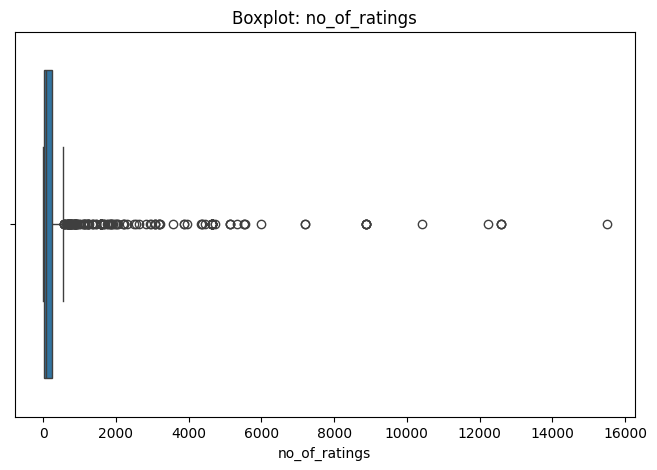

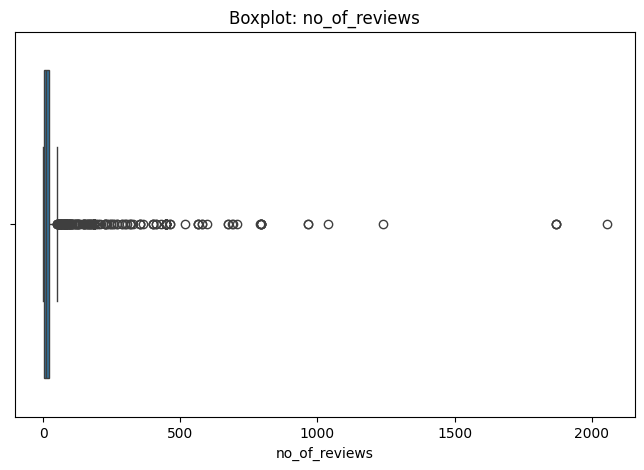

In [32]:
# Построение коробчатых диаграмм
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=laptops_df[column])
    plt.title(f'Boxplot: {column}')
    plt.show()


## Матрица корреляции и тепловая карта
Тепловая карта показывает взаимосвязь между числовыми переменными:
- Слабая корреляция между ценой и рейтингом указывает на то, что рейтинг не сильно зависит от стоимости устройства.
- Практически отсутствует корреляция между характеристиками, такими как объём памяти, и пользовательским рейтингом.

### Выводы:
- Рейтинг определяется не только техническими характеристиками, но и другими факторами, такими как бренд, удобство использования и послепродажное обслуживание.



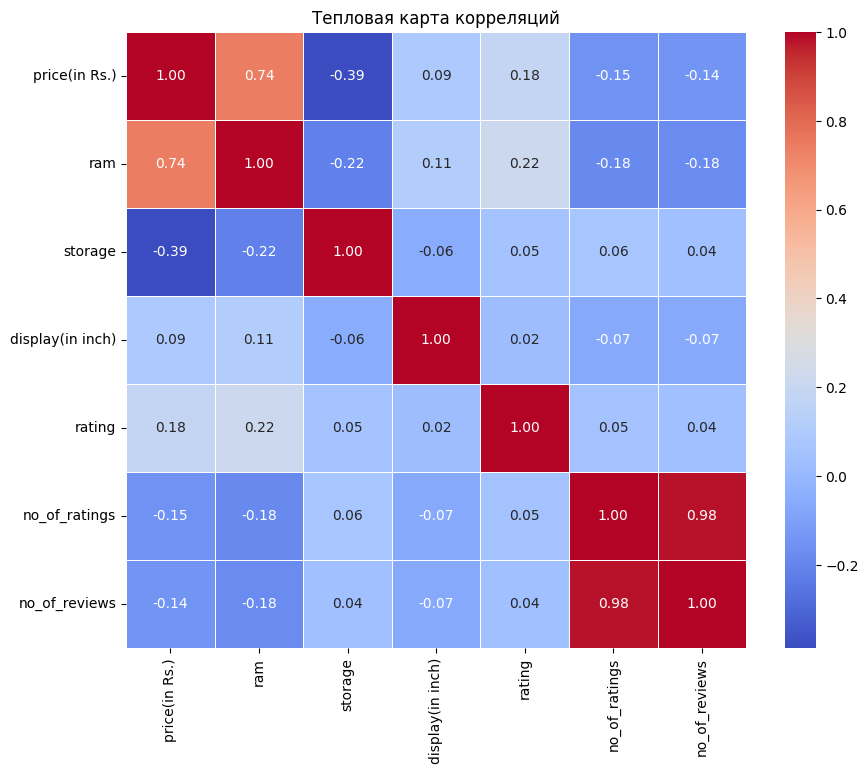

In [33]:
# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = laptops_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()


Выводы и рекомендации
markdown
Копировать код


### Основные выводы:
1. Наиболее популярные характеристики:
   - RAM: 8–16 ГБ.
   - SSD: 512 ГБ.
   - OS: Windows 11.
   - Экран: 15.6 дюйма.
2. Влияние характеристик на рейтинг:
   - Цена слабо коррелирует с рейтингом.
   - Высокие рейтинги у моделей среднего класса (40,000–80,000 рупий).
3. Целевая аудитория:
   - Устройства средней ценовой категории получили больше положительных отзывов.

### Рекомендации:
- Выпустить ноутбук с характеристиками:
  - RAM: 8–16 ГБ.
  - SSD: 512 ГБ.
  - OS: Windows 11.
  - Экран: 15.6 дюйма.
  - Цена: 60,000–80,000 рупий.
- Добавить конфигурацию характеристик для пользователей.